In [10]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [121]:
#pip install --upgrade pip

In [5]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.



# Classification task using the Heart Disease Dataset


This dataset includes various patient attributes that can be used to predict the presence of heart disease. The features include age, sex, chest pain type, resting blood pressure, and cholesterol levels, with a total of 303 instances.

Your task is to classify whether a person has heart disease or not. The last column, labeled "target," contains the classification: 0 indicates no heart disease, and 1 indicates the presence of heart disease.

Once you have made your predictions, use some records from the dataset as test data. Then, calculate the accuracy score by comparing your predicted results with the actual target values.

# Neural Networks

In [ ]:
file_path = 'heart-2.csv'
data = pd.read_csv(file_path)

features = data.iloc[:, :-1]
target = data.iloc[:, -1]

if target.dtype == 'object':
    le = LabelEncoder()
    target = le.fit_transform(target)

# One-hot encode the target for classification tasks
target = to_categorical(target)

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),                                   # Hidden layer
    Dense(y_train.shape[1], activation='softmax')                   # Output layer
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("Predictions:", predicted_classes)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6408 - loss: 0.6488 - val_accuracy: 0.7866 - val_loss: 0.4690
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.3649 - val_accuracy: 0.8049 - val_loss: 0.4123
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.3042 - val_accuracy: 0.8354 - val_loss: 0.4053
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8895 - loss: 0.2865 - val_accuracy: 0.8354 - val_loss: 0.3926
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8993 - loss: 0.2553 - val_accuracy: 0.8415 - val_loss: 0.3745
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9060 - loss: 0.2338 - val_accuracy: 0.8537 - val_loss: 0.3649
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9307 - loss: 0.2049 - val_accuracy: 0.8476 - val_loss: 0.3624
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9161 - loss: 0.1974 - val_accuracy: 0.8720 - val_loss:

# Logistic regression

In [ ]:
file_path = 'heart-2.csv'
data = pd.read_csv(file_path)

features = data.iloc[:, :-1]  # Features
target = data.iloc[:, -1]   # Target

if target.dtype == 'object':
    le = LabelEncoder()
    target = le.fit_transform(target)

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train and predict
lr = LogisticRegression(max_iter=1000, multi_class='auto')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Inspect probabilities if needed
probabilities = lr.predict_proba(X_test)
print("Predicted Probabilities (first 5 samples):")
print(probabilities[:5])


Accuracy: 0.7951219512195122
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Predicted Probabilities (first 5 samples):
[[0.02512541 0.97487459]
 [0.00309611 0.99690389]
 [0.98529152 0.01470848]
 [0.02897686 0.97102314]
 [0.95722868 0.04277132]]


# Decision Tree

Accuracy: 0.9853658536585366
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



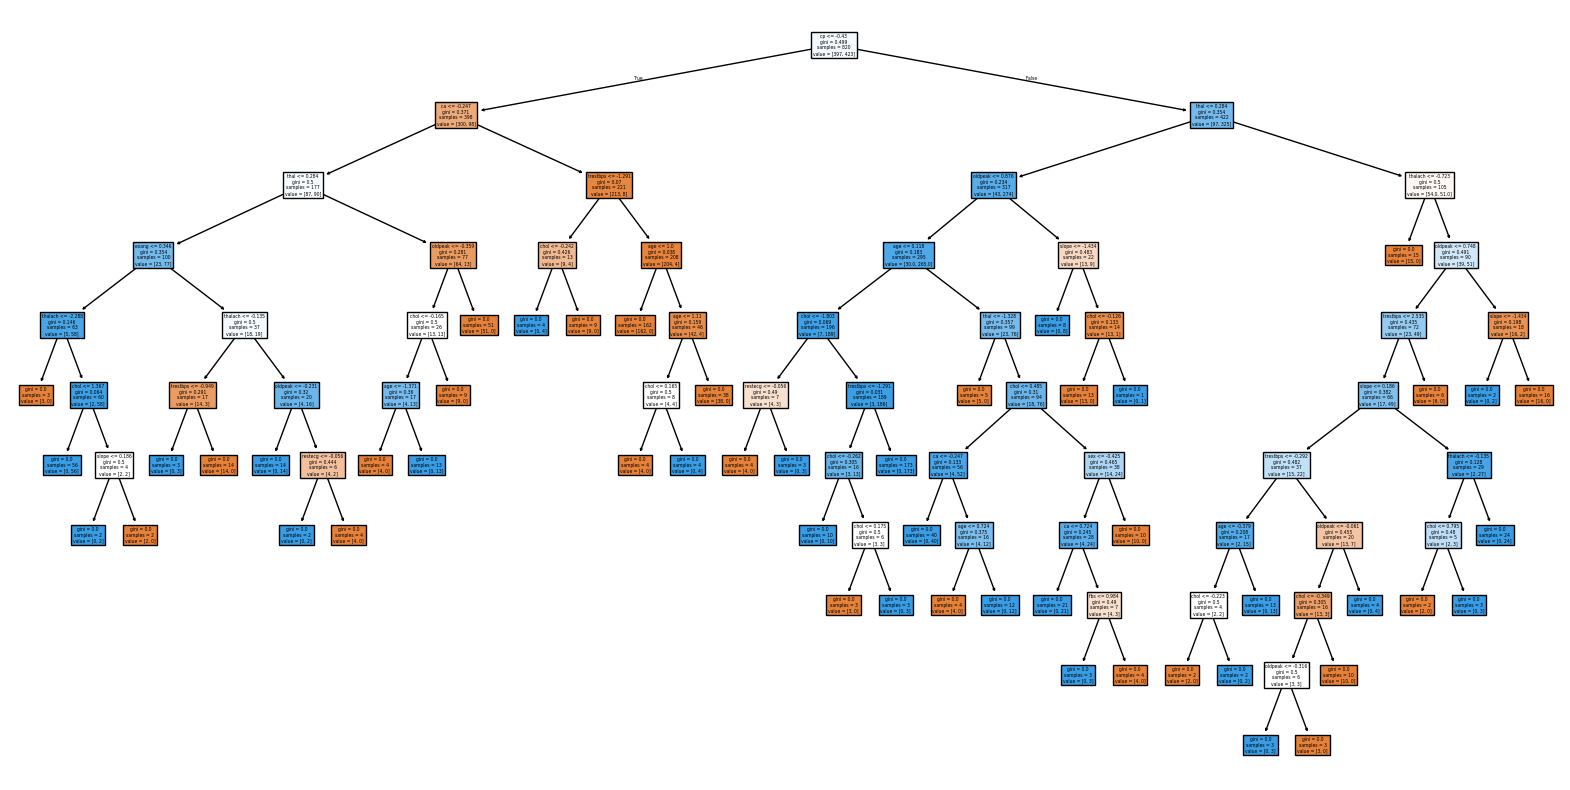

In [ ]:
file_path = 'heart-2.csv'
data = pd.read_csv(file_path)

features = data.iloc[:, :-1]  # Features
target = data.iloc[:, -1]   # Target

if target.dtype == 'object':
    le = LabelEncoder()
    target = le.fit_transform(target)

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train and predict
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)  # Default settings
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree=dt, feature_names=data.columns[:-1], class_names=None, filled=True)
plt.show()
